In [29]:
import pandas as pd
import numpy as np
%matplotlib notebook


In [56]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Tobacco.csv"
TobaccoData = pd.read_csv(url)

In [3]:
TobaccoData.head()

,Unnamed: 0,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,1,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,2,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,3,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,4,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,5,inactself,flanders,2,0,1,13.80800,0,0.021981,2


In [57]:
del TobaccoData['Unnamed: 0']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2


Here is the data dictionary of this dataset:
https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Tobacco.html

In [58]:
region_dummy  = pd.get_dummies(TobaccoData['region'], prefix = 'region')
del region_dummy['region_flanders']

occupation_dummy = pd.get_dummies(TobaccoData['occupation'], prefix = 'occupation')
del occupation_dummy['occupation_inactself']

age_dummy = pd.get_dummies(TobaccoData['age'], prefix = 'age')
del age_dummy['age_0']

TobaccoData = pd.concat([TobaccoData,region_dummy ,occupation_dummy, age_dummy], axis=1)
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2,0,0,1,0,0,1,0,0
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3,0,0,0,0,0,0,1,0
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2,0,0,0,1,0,1,0,0
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2,0,0,1,0,0,1,0,0
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2,0,0,0,0,0,1,0,0


#### We would like to use a Decision Tree Regression model to detect the most important variables affect expenditure on tobacco. Please follow necessary steps to develop your Regression Tree, Tune it via Cross-Validation and lastly state the most important variable you found with the corresponding MSE of your best model. Your output is stobacco

In [34]:
X = TobaccoData[TobaccoData.columns.values]
del X["stobacco"]
del X["region"]
del X["occupation"]
y = TobaccoData["stobacco"]
del X["age"]

,occupation,region,nkids,nkids2,nadults,lnx,salcohol,age,region_brussels,region_brussels,...,occupation_whitecol,occupation_whitecol,age_1,age_1,age_2,age_2,age_3,age_3,age_4,age_4
0,bluecol,flanders,1,0,2,14.19054,0.000000,2,0,0,...,0,0,0,0,1,1,0,0,0,0
1,inactself,flanders,0,0,3,13.90857,0.002285,3,0,0,...,0,0,0,0,0,0,1,1,0,0
2,whitecol,flanders,0,0,1,13.97461,0.012875,2,0,0,...,1,1,0,0,1,1,0,0,0,0
3,bluecol,flanders,1,0,2,13.76281,0.005907,2,0,0,...,0,0,0,0,1,1,0,0,0,0
4,inactself,flanders,2,0,1,13.80800,0.021981,2,0,0,...,0,0,0,0,1,1,0,0,0,0


In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [36]:
from sklearn import metrics
import numpy as np
preds = dt.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, preds))


0.033622471157859185

<IPython.core.display.Javascript object>


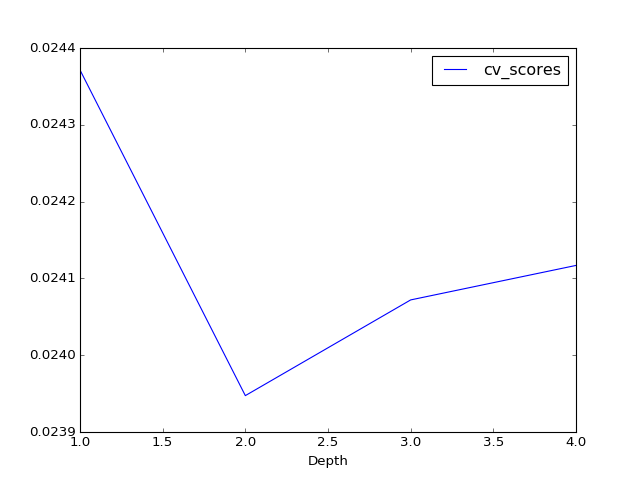

In [38]:
from sklearn.cross_validation import cross_val_score
Depth = range(1,5)
total_score = []
for i in Depth:
    dt = DecisionTreeRegressor(max_depth = i)
    scores = cross_val_score(dt, X, y, cv=10, scoring = "mean_squared_error")
    total_score.append(np.mean(np.sqrt(-scores)))
    
Depth_df = pd.DataFrame({"cv_scores" : total_score, "Depth" : Depth})
Depth_df.plot(x="Depth", y="cv_scores")
    

In [39]:

dt = DecisionTreeRegressor(max_depth =2)
dt.fit(X,y)
Importances = pd.DataFrame({"feature":X.columns.values, "importance" : dt.feature_importances_})
Importances.sort_values(by = ["importance"], ascending = 0)

,feature,importance
3,lnx,0.526694
12,age_4,0.473306
0,nkids,0.000000
1,nkids2,0.000000
2,nadults,0.000000
4,salcohol,0.000000
5,region_brussels,0.000000
6,region_walloon,0.000000
7,occupation_bluecol,0.000000
8,occupation_whitecol,0.000000


Explain your findings:

In [ ]:
IT seems that lnx and age_4 is the most important variables when calculating stobacco

#### Now, let's treat stobacco as a dummy variable to distinguish between those who smoke and who do not. We then need to use decision tree classifier to identify the most important features that may affect probability of smoking.

In [59]:
TobaccoData['smoke'] = '1'
mask_cat0 = (TobaccoData['stobacco'] == 0)   

TobaccoData.loc[mask_cat0,'smoke'] = '0'
del TobaccoData['stobacco']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,salcohol,age,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4,smoke
0,bluecol,flanders,1,0,2,14.19054,0.000000,2,0,0,1,0,0,1,0,0,0
1,inactself,flanders,0,0,3,13.90857,0.002285,3,0,0,0,0,0,0,1,0,0
2,whitecol,flanders,0,0,1,13.97461,0.012875,2,0,0,0,1,0,1,0,0,0
3,bluecol,flanders,1,0,2,13.76281,0.005907,2,0,0,1,0,0,1,0,0,0
4,inactself,flanders,2,0,1,13.80800,0.021981,2,0,0,0,0,0,1,0,0,0


In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 5)
X = TobaccoData[TobaccoData.columns.values]
del X["occupation"]
del X["region"]
del X["age"]

y = TobaccoData["smoke"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
dt.fit(X_train,y_train)
preds = dt.predict(X_test)
scores = cross_val_score(dt, X, y, cv=10)
X.head()
del X["smoke"]


<IPython.core.display.Javascript object>


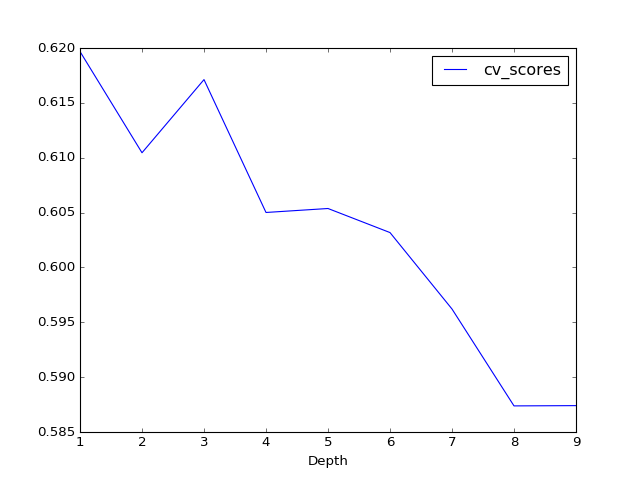

In [68]:
Depth = range(1,10)
total_score = []
for i in Depth:
    dt = DecisionTreeClassifier(max_depth = i,
                               min_samples_leaf = 10)
    scores = cross_val_score(dt, X, y, cv=10)
    total_score.append(np.mean(scores))
    
Depth_df = pd.DataFrame({"cv_scores" : total_score, "Depth" : Depth})
Depth_df.plot(x="Depth", y="cv_scores")

In [72]:
dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 5)
dt.fit(X, y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':dt.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

,feature,importance
12,age_4,0.529598
3,lnx,0.209674
8,occupation_whitecol,0.097007
2,nadults,0.085212
4,salcohol,0.078509
0,nkids,0.000000
1,nkids2,0.000000
5,region_brussels,0.000000
6,region_walloon,0.000000
7,occupation_bluecol,0.000000


Age_4 seems far away to be the most important feature in this, then lnx, whitecollar occupation, adults and salcohol are the next most important details in the dataset.